# Cornershop's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Perform exploratory data analysis.

# Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
    * Function's Definition
        * Expand dates, create day of the week column and transform time to pure number
        * Calculate the distance between the deliver and the branch location
        * Calculate na number of type of itens and distinct itens per order
* Loading data
    * To Train \& Test
        * Creating some nice resources
    * Dataset's Macro View: Order Level
* Exploratory Data Analysis
    * Hypotheses
    * Univariate Analysis
        * Resource: quantity
            * Number of itens and distinct items per order
        * Datetime resource: promised_time
        * Rating plus speed resources: found_rate, accepted_rate, rating
        * Distance Resource
        * Resource: seniority
        * Target Analysis: total_minutes
    * Bivariate Analysis
        * Quantity VS target
        * Distance VS target
        * on_demand VS target
        * seniority VS target
        * found_rate VS target
        * picking_speed VS target
        * accepted_rate VS target
        * rating VS target
    * Correlation Analysis
        * Pairwise analysis
        * Cross-correlation analysis
    * Hypotheses: Conclusion
    

# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables
* Function's Definition
    * Expand dates, create day of the week column and transform time to pure number
    * Calculate the distance between the deliver and the branch location
    * Calculate na number of itens and distinct itens per order

## Loading Libraries and Packages

In [1]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
from datetime import (datetime, date)
import geopy.distance

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls ..\data\

 O volume na unidade C nÃ£o tem nome.
 O NÃºmero de SÃ©rie do Volume Ã© 1210-43E2

 Pasta de C:\Users\mbroilo\Documents\Arbeit\Personal\projects\cornershop\data

31/03/2022  10:19    <DIR>          .
27/03/2022  11:57    <DIR>          ..
29/03/2022  20:02        64.304.021 20220329_merged_full.csv
29/03/2022  20:02        12.563.082 20220329_merged_predict.csv
29/03/2022  20:03        51.741.160 20220329_merged_train_test.csv
               3 arquivo(s)    128.608.263 bytes
               2 pasta(s)   146.428.649.472 bytes disponÃ­veis


## Configurations

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 12}

sns.set(rc=rc)
sns.set_palette("Set2")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [4]:
PATH_RAWDATA = "../raw_data/"
PATH_DATA = "../data/"
DATASET_TT = "20220329_merged_train_test.csv"
DATE = time.strftime("%Y%m%d")

## Function's Definition

### Expand dates, create day of the week column and transform time to pure number

In [5]:
def dateTimeConverter(dataset, col):
    """
    Describe the function!
    """
    day_of_week = list(pd.to_datetime(dataset[col], format='%Y-%m-%d').dt.dayofweek)
    dataset['day_of_week'] = day_of_week
    dataset[[col+'_DATE', col+'_HOUR']] = dataset[col].str.split(" ", expand=True)
    dataset[[col+'_HOUR', col+'_HOUR2']] = dataset[col+'_HOUR'].str.split("+", expand=True)
    dataset[[col+'_HH', col+'_MIN', col+'_SEC']] = dataset[col+'_HOUR'].str.split(":", expand=True)
    dataset['pure_time'] = dataset[col+'_HH'].astype(int) + (dataset[col+'_MIN'].astype(int) / 60) + (dataset[col+'_SEC'].astype(float) / 3600)
    
    del dataset[col+'_HOUR2'], dataset[col+'_HH'], dataset[col+'_MIN'], dataset[col+'_SEC']
        
    return dataset

### Calculate the distance between the deliver and the branch location

In [6]:
def calculateDistance(dataset, latX, lngX, latY, lngY):
    """
    Describe the function!
    """
    coordsX = list(zip(dataset[latX], dataset[latX]))
    coordsY = list(zip(dataset[latY], dataset[latY]))
    
    dataset['coordsX'] = coordsX
    dataset['coordsY'] = coordsY
    dist = []
                   
    for i in range(len(dataset)):
        distCalc = geopy.distance.distance(coordsX[i], coordsY[i]).km
        dist.append(distCalc)

    dataset['distance'] = dist
    
    return dataset

### Calculate na number of type of itens and distinct itens per order

In [7]:
def calculateItem(dataset, colUnit, colQuantity):
    """
    Describe the function!
    """
    no_item = []
    weight = []

    for i in range(len(dataset)):
        if dataset[colUnit][i] == 'UN':
            no_item.append(dataset[colQuantity][i])
            weight.append(0)
        elif dataset[colUnit][i] == 'KG':
            no_item.append(1)
            weight.append(dataset[colQuantity][i])
        else:
            no_item.append(np.nan)
            weight.append(np.nan)

    dataset['no_item'] = no_item
    dataset['weight'] = weight
    
    return dataset

# Loading Data
* To Train \& Test
    * Creating some nice resources
* Dataset's Macro View:  Order Level

## To Train \& Test

In [8]:
df_tt = pd.read_csv(PATH_DATA + DATASET_TT, sep=',')
df_tt['item'] = 1 # add this column only to groupby the dataset
print(df_tt.shape)
df_tt.head()

(158325, 20)


,order_id,lat_order,lng_order,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_storebranch,lng_storebranch,product_id,quantity,buy_unit,item
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fb3336fca8851437f980e83045e75749,0.581,KG,1
1,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,dab05166de7d42c526f5627acad97902,1.000,UN,1
2,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,c49f0bd639bcbee3c331abdb48b653da,1.000,UN,1
3,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,16984fbb57316494a14543ad6d70a2e8,1.000,UN,1
4,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fbfb98804142023129c9475f72db5b08,1.000,UN,1


### Creating some nice resources

In [9]:
### Calculate na number of type of itens and distinct itens per order
calculateItem(df_tt, 'buy_unit', 'quantity')

### Expand dates, create day of the week column and transform time to pure number
dateTimeConverter(df_tt, 'promised_time')

### Calculate the distance between the deliver and the branch location
calculateDistance(df_tt, 'lat_order', 'lng_order', 'lat_storebranch', 'lng_storebranch')

print(df_tt.shape)
df_tt.head()

(158325, 29)


,order_id,lat_order,lng_order,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_storebranch,lng_storebranch,product_id,quantity,buy_unit,item,no_item,weight,day_of_week,promised_time_DATE,promised_time_HOUR,pure_time,coordsX,coordsY,distance
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fb3336fca8851437f980e83045e75749,0.581,KG,1,1.0,0.581,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
1,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,dab05166de7d42c526f5627acad97902,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
2,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,c49f0bd639bcbee3c331abdb48b653da,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
3,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,16984fbb57316494a14543ad6d70a2e8,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
4,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fbfb98804142023129c9475f72db5b08,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267


## Dataset's Macro View:  Order Level

In [10]:
macro = df_tt[df_tt.columns].groupby(by=[
    'order_id',
    'shopper_id',
    'store_branch_id',
    'store_id',
    'seniority',
    'on_demand',
    'promised_time',
    'day_of_week'
], as_index=False).agg(
    {
        'total_minutes':['mean'],
        'pure_time':['mean'],
        'found_rate':['mean'],
        'picking_speed':['mean'],
        'accepted_rate':['mean'],
        'rating':['mean'],
        'distance':['mean'],
        'no_item':['sum'],
        'quantity':['sum'],
        'item':['sum']
    }
).copy()

macro.columns = macro.columns.droplevel(1)
macro

,order_id,shopper_id,store_branch_id,store_id,seniority,on_demand,promised_time,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item
0,0004a3841c1eeb6c6e77585a941c21e0,9142155b2c404cf6fa3d25db2053da03,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,True,2019-10-18 20:18:00+00:00,4,39.001464,20.300000,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4
1,0005a6ecbbde1e8d273f5577bcff2c9c,169a1820a33c9cb6037ef27025cbbe62,06fe1c234519f6812fc4c1baae25d6af,918317b57931b6b7a7d29490fe5ec9f9,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 21:09:00+00:00,4,41.164442,21.150000,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1
2,0007baeb6700fc203be2d1f1e11222d7,be1b1c18b570dde0053ac1de527fc7c2,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,False,2019-10-19 00:00:00+00:00,5,136.453089,0.000000,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22
3,0012195a6a8ca9ec308a3010eeea8ebc,572adecb1c4538ef2492dfbd3b951c83,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,False,2019-10-19 18:00:00+00:00,5,72.853598,18.000000,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11
4,0013011fa72b498b9feb84f4e7104980,92ce0da04dc7370cdf2ab85232caa754,45fbc6d3e05ebd93369ce542e8f2322d,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,False,2019-10-19 00:00:00+00:00,5,143.040919,0.000000,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,bd601d85deffaffd46e02aaa1a1606c2,1679091c5a880faf6fb5e6087eb1b2dc,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,False,2019-10-19 15:00:00+00:00,5,92.146266,15.000000,0.8853,1.30,1.000000,4.76,5.799480,16.0,18.100,15
7996,ffcc66cd4d1056b67523a39ff07d7700,3148c351563fde7522d9dee34753d32c,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,True,2019-10-18 22:19:00+00:00,4,57.553529,22.316667,0.8973,0.97,1.000000,4.84,0.333459,72.0,72.015,40
7997,ffcf270be4bba33349ce827c70fe9439,9322e287d34f4cf4ab14e4c319362f3c,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,False,2019-10-19 17:00:00+00:00,5,103.938002,17.000000,0.8981,1.37,0.960000,4.80,4.513264,53.0,52.332,22
7998,ffdbc12cfcf7101a517a7eb7e1776c43,525fb85152938731f5961e37b4b5126a,0d73a25092e5c1c9769a9f3255caa65a,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-19 14:43:00+00:00,5,40.134711,14.716667,0.8771,1.07,0.840000,4.92,1.391585,39.0,39.602,23


# Exploratory Data Analysis
* Hypotheses
* Univariate Analysis
    * Resource: quantity
        * Number of itens and distinct items per order
    * Datetime resource: promised_time
    * Rating plus speed resources: found_rate, accepted_rate, rating
    * Distance Resource
    * Resource: seniority
    * Target Analysis: total_minutes
* Bivariate Analysis
    * Quantity VS target
    * Distance VS target
    * on_demand VS target
    * seniority VS target
    * found_rate VS target
    * picking_speed VS target
    * accepted_rate VS target
    * rating VS target
* Correlation Analysis
    * Pairwise analysis
    * Cross-correlation analysis
* Hypotheses: Conclusion
    
    

## Hypothesis

<br>
<table>
	<thead>
        <tr>
			<th colspan = "3" style="text-align:center;">Hypotheses summary</th>
		</tr>
		<tr>
			<th>Group</th>
			<th>#</th>
			<th>Hypothesis</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Products <br> informations</strong></td>
			<td><strong>H1</strong></td>
			<td style="background-color:#dde2ed;">More products ordered imply more time to complete the order.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="2" style="background-color:#dde2ed;"><strong>Orders <br> informations</strong></td>
			<td><strong>H2</strong></td>
			<td style="background-color:#dde2ed;">The farthest the customer is than more time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H3</strong></td>
			<td style="background-color:#dde2ed;">If the order is on demand than lesser time to complete the order.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="5" style="background-color:#dde2ed;"><strong>Shopper <br> informations</strong></td>
			<td><strong>H4</strong></td>
			<td style="background-color:#dde2ed;">High seniority implies less time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H5</strong></td>
			<td style="background-color:#dde2ed;">High found rate implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H6</strong></td>
			<td style="background-color:#dde2ed;">High picking speed implies less time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H7</strong></td>
			<td style="background-color:#dde2ed;">High accepted rate implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H8</strong></td>
			<td style="background-color:#dde2ed;">High rating implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Store Branch <br> informations</strong></td>
			<td><strong>H9</strong></td>
			<td style="background-color:#dde2ed;">The farthest the branch is than more time to complete the order.</td>
		</tr>
    </tbody>
</table>

## Univariate Analysis

### Resource: Quantity

* This resource is segmented in individual itens and also weigthed itens. 
* Therefore, it's a bit difficult to work with this resource without performing any change in it.
    1. **buy_unit** is the measure unit of the **quantity** resource
    1. **quantity** is simply how many "pieces of itens per products". But when grouped, it means the sum of all these pieces (either in units of UN or KG). Therefore, when grouped it can be interpreted as the total number of piecs of product itens per order.
    1. **item** is just a tracking resource, *i.e* is can be viewed as a way to identify the number of distinct products.

In [11]:
quantityByUnit = df_tt[df_tt.buy_unit=='UN'][['order_id','item','quantity']].groupby(by=[
    'order_id'
],as_index=False).sum(['item','quantity']).copy()

quantityByUnit[['quantity','item']]

,quantity,item
0,8.0,4
1,2.0,1
2,39.0,22
3,13.0,11
4,63.0,42
...,...,...
7913,13.0,12
7914,68.0,36
7915,52.0,21
7916,36.0,20


In [12]:
quantityByUnit.iloc[:,-2:].describe().T

,count,mean,std,min,25%,50%,75%,max
item,7918.0,18.203587,15.355827,1.0,7.0,15.0,26.0,139.0
quantity,7918.0,34.736423,33.098948,1.0,11.0,26.0,49.0,317.0


In [13]:
quantityByKg = df_tt[df_tt.buy_unit=='KG'][['order_id','item','quantity']].groupby(by=[
    'order_id'
],as_index=False).sum(['item','quantity']).copy()

quantityByKg.iloc[:,-2:]

,item,quantity
0,2,1.636
1,1,1.800
2,1,0.710
3,4,3.033
4,3,2.798
...,...,...
5039,1,0.268
5040,3,5.100
5041,4,4.015
5042,1,0.332


In [14]:
quantityByKg.iloc[:,-2:].describe().T

,count,mean,std,min,25%,50%,75%,max
item,5044.0,2.809675,2.007288,1.000,1.0000,2.00,4.0000,16.000
quantity,5044.0,2.730267,2.716746,0.055,0.9495,1.92,3.6005,32.492


#### Number of itens and distinct items per order

* Calculating **no_itens**: the number of type of itens per order
    * *i.e*, when **buy_unit** is UN, then number of type of itens is exactly it's quantitiy, else it's zero or null.
* Calculating **weight**: the weight of the quantity with units of KG
    * Not a good resource...

In [15]:
df_tt[['quantity','no_item','weight','item']]

,quantity,no_item,weight,item
0,0.581,1.0,0.581,1
1,1.000,1.0,0.000,1
2,1.000,1.0,0.000,1
3,1.000,1.0,0.000,1
4,1.000,1.0,0.000,1
...,...,...,...,...
158320,2.000,2.0,0.000,1
158321,1.000,1.0,0.000,1
158322,2.000,2.0,0.000,1
158323,1.000,1.0,0.000,1


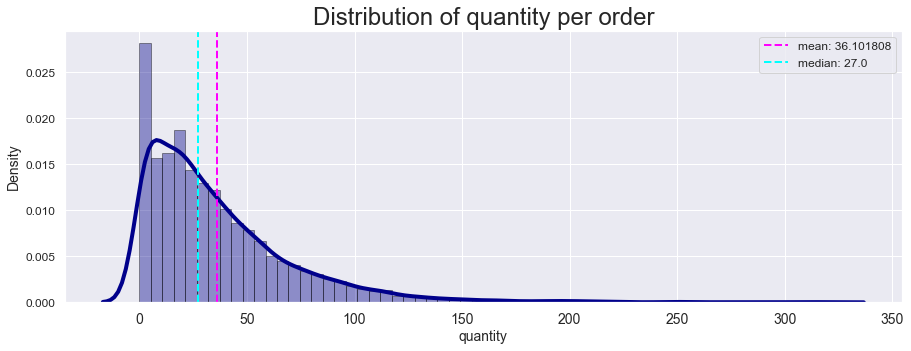

In [16]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.quantity, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.quantity.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.quantity.mean().round(6))}")

ax.axvline(macro.quantity.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"median: {str(macro.quantity.median().round(6))}")

plt.title("Distribution of quantity per order")
plt.legend(loc='upper right')

del ax

* The quantity distribution is a left skewed one if mean roughly as 36 itens per order.

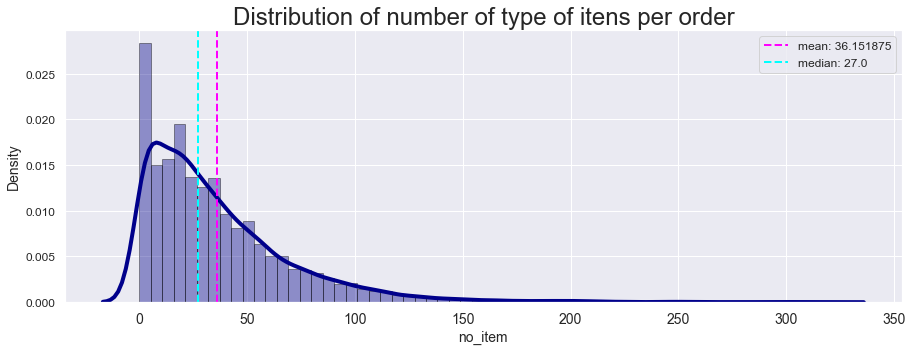

In [17]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.no_item, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.no_item.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.no_item.mean().round(6))}")

ax.axvline(macro.no_item.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"median: {str(macro.no_item.median().round(6))}")

plt.title("Distribution of number of type of itens per order")
plt.legend(loc='upper right')

del ax

* The number of itens distribution is a left skewed one if mean roughly as 36 itens per order.

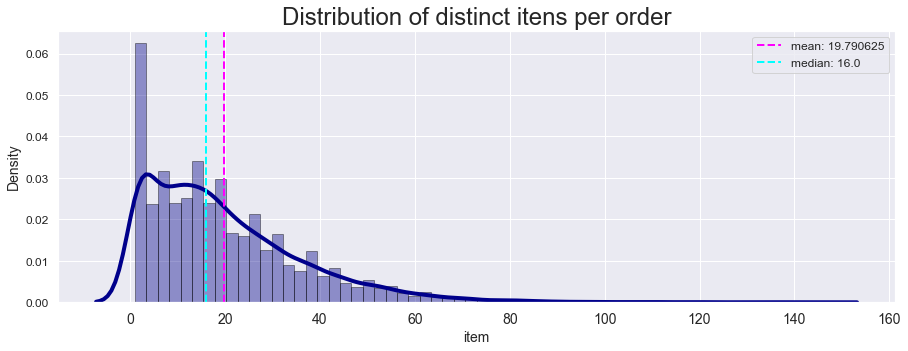

In [18]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.item, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.item.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.item.mean().round(6))}")

ax.axvline(macro.item.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"median: {str(macro.item.median().round(6))}")

plt.title("Distribution of distinct itens per order")
plt.legend(loc='upper right')

del ax

* On the other hand, the number of distinct itens is about 20 per order, ad it's also a left skewd distribution.

In [19]:
len(df_tt[df_tt.buy_unit.isnull()==True])

17

### Datetime resource: promised_time

* **promised_time** means the deliver time which was previously promised to the user
* let's expand this datetime resource in its components

In [20]:
print(df_tt.shape)
df_tt.head()

(158325, 29)


,order_id,lat_order,lng_order,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_storebranch,lng_storebranch,product_id,quantity,buy_unit,item,no_item,weight,day_of_week,promised_time_DATE,promised_time_HOUR,pure_time,coordsX,coordsY,distance
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fb3336fca8851437f980e83045e75749,0.581,KG,1,1.0,0.581,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
1,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,dab05166de7d42c526f5627acad97902,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
2,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,c49f0bd639bcbee3c331abdb48b653da,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
3,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,16984fbb57316494a14543ad6d70a2e8,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267
4,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.3,0.92,4.76,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,fbfb98804142023129c9475f72db5b08,1.000,UN,1,1.0,0.000,4,2019-10-18,20:48:00,20.8,"(-33.5016745551528, -33.5016745551528)","(-33.48528, -33.48528)",2.372267


**day_of_week**: 
1. [0, 1, 2, 3, 4, 5, 6, 7]
1. [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]


In [29]:
macro[['promised_time','day_of_week','pure_time']]

,promised_time,day_of_week,pure_time
0,2019-10-18 20:18:00+00:00,4,20.300000
1,2019-10-18 21:09:00+00:00,4,21.150000
2,2019-10-19 00:00:00+00:00,5,0.000000
3,2019-10-19 18:00:00+00:00,5,18.000000
4,2019-10-19 00:00:00+00:00,5,0.000000
...,...,...,...
7995,2019-10-19 15:00:00+00:00,5,15.000000
7996,2019-10-18 22:19:00+00:00,4,22.316667
7997,2019-10-19 17:00:00+00:00,5,17.000000
7998,2019-10-19 14:43:00+00:00,5,14.716667


In [30]:
print(f"day_of_week: \n{macro['day_of_week'].value_counts(' ')}")

day_of_week: 
5    0.709125
4    0.290750
6    0.000125
Name: day_of_week, dtype: float64


The **promised_time** (day of week) for the deliveries are all Friday, Saturday and Sunday:
* $29.08\%$ on Fridays
* $70.91\%$ on Saturdays
* $0.0125\%$ on Sundays

* the created resource **pure_time** means simply the time as a pure number, *e.g* 13.5 is 13h30min.

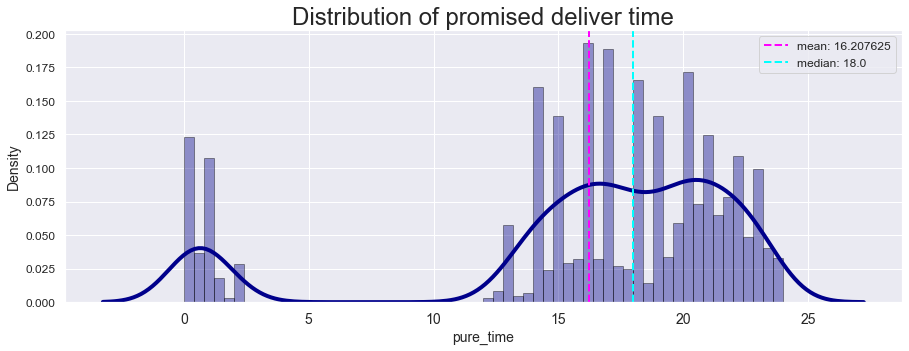

In [23]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.pure_time, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.pure_time.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.pure_time.mean().round(6))}")

ax.axvline(macro.pure_time.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"median: {str(macro.pure_time.median().round(6))}")

plt.title("Distribution of promised deliver time")
plt.legend(loc='upper right')

del ax

In [24]:
macro[['pure_time']][macro.pure_time<8]

,pure_time
2,0.000000
4,0.000000
11,1.000000
13,1.000000
14,1.000000
...,...
7948,1.316667
7951,0.000000
7981,2.000000
7984,0.783333


In [25]:
macro[['pure_time']][macro.pure_time>20]

,pure_time
0,20.300000
1,21.150000
6,20.433333
9,22.100000
12,22.000000
...,...
7988,23.466667
7991,21.366667
7994,22.666667
7996,22.316667


* Most probably this is an odd behavior for deliveries
    1. For **promised_time** less than 5 a.m. and also greater than 20-21 p.m.

In [26]:
df_tt.promised_time_DATE.value_counts()

2019-10-19    118964
2019-10-18     39323
2019-10-20        38
Name: promised_time_DATE, dtype: int64

* All data corresponds to a range-date of 3 days.
    1. Where only one **promised_time** was set for Sunday (2019-10-20)
    1. Which is another odd behavior

### Rating plus speed resources: found_rate, accepted_rate, rating

* **found_rate** is the percentage of products found by shopper historical.
* **accepted_rate** is the percentage of orders historically accepted by shopper
* **rating** means the client rating of shopper

In [31]:
macro[['order_id', 'found_rate', 'accepted_rate', 'rating', 'picking_speed']]

,order_id,found_rate,accepted_rate,rating,picking_speed
0,0004a3841c1eeb6c6e77585a941c21e0,0.8473,0.920000,4.88,2.30
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.8407,0.840000,4.72,1.57
2,0007baeb6700fc203be2d1f1e11222d7,0.9012,1.000000,4.92,2.50
3,0012195a6a8ca9ec308a3010eeea8ebc,0.8781,0.920000,4.88,1.27
4,0013011fa72b498b9feb84f4e7104980,0.8301,0.857143,5.00,3.12
...,...,...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,0.8853,1.000000,4.76,1.30
7996,ffcc66cd4d1056b67523a39ff07d7700,0.8973,1.000000,4.84,0.97
7997,ffcf270be4bba33349ce827c70fe9439,0.8981,0.960000,4.80,1.37
7998,ffdbc12cfcf7101a517a7eb7e1776c43,0.8771,0.840000,4.92,1.07


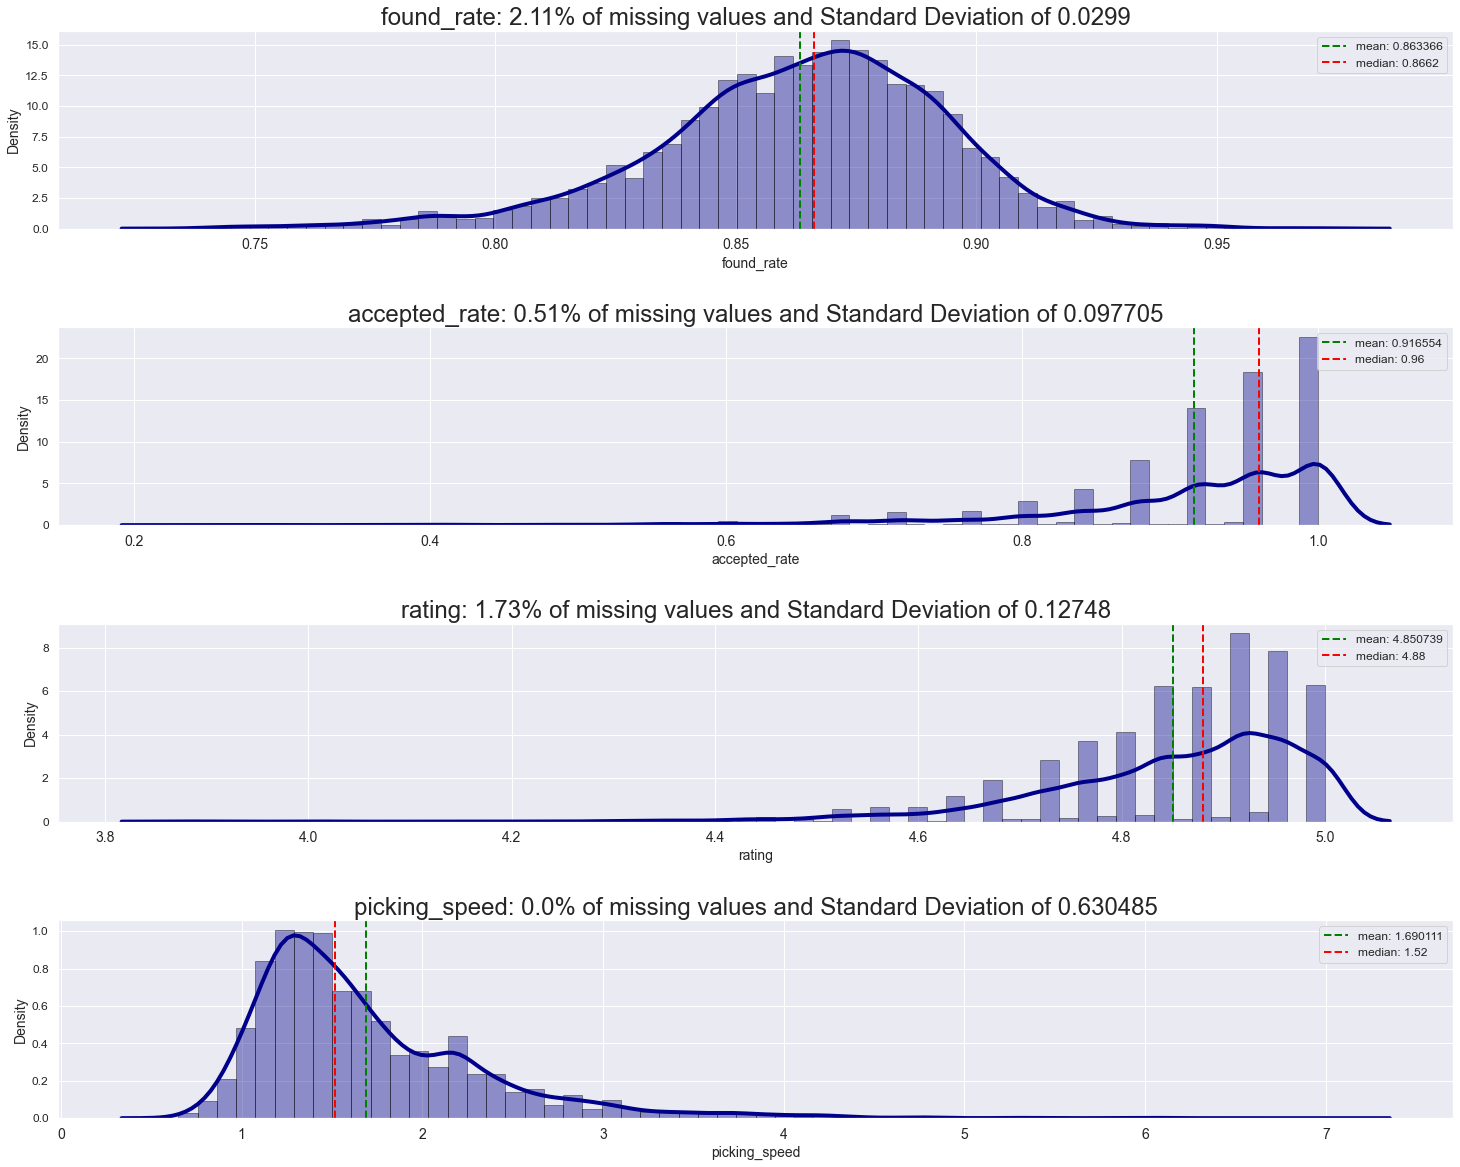

In [32]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

j=1
for i in ['found_rate','accepted_rate','rating', 'picking_speed']:
    plot = plt.subplot(4, 1, j)
    ax = sns.distplot(macro[i], hist=True, kde=True, 
             bins=int(180/3), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    ax.axvline(macro[i].mean(), 
               color='green', 
               linestyle='dashed', 
               linewidth=2, 
               label=f"mean: {str(macro[i].mean().round(6))}")
    
    ax.axvline(macro[i].median(), 
               color='red', 
               linestyle='dashed', 
               linewidth=2, 
               label=f"median: {str(macro[i].median().round(6))}")
    
    plt.title(f"{i}: {round(len(macro[i][macro[i].isnull()==True])/len(macro[i]) * 100, 2)}% of missing values and Standard Deviation of {str(macro[i].std().round(6))}")
    plt.legend(loc='upper right')
    j += 1

del ax

In [33]:
print(f"Média + 1 std = {round(macro.found_rate.mean() + macro.found_rate.std(), 2)}")
print(f"Média - 1 std = {round(macro.found_rate.mean() - macro.found_rate.std(), 2)}")

Média + 1 std = 0.89
Média - 1 std = 0.83


**Notice that:**
* **found_rate** has a quasi-normal shape (gaussian), for this reason we could say that around $68\%$ can be found in the shopper historical witha a found rate interval of $[\mu-\sigma, \mu+\sigma] = [0.83, 0.89]$
* **accepted_rate** and **rating** are too much left skewed
    1. which in fact makes sense, because most of the order must be accecpted by the shopper, otherwise their rating would be low
    1. however, most of the rating are between 4.8 - 5.0
    1. most probably there's a strong correlation between these two resources
* On the other hand, **picking_speed** is right skewed

### Resource: on_demand

In [34]:
print(macro.on_demand.value_counts(' '))

macro[['order_id', 'on_demand']]

False    0.54525
True     0.45475
Name: on_demand, dtype: float64


,order_id,on_demand
0,0004a3841c1eeb6c6e77585a941c21e0,True
1,0005a6ecbbde1e8d273f5577bcff2c9c,True
2,0007baeb6700fc203be2d1f1e11222d7,False
3,0012195a6a8ca9ec308a3010eeea8ebc,False
4,0013011fa72b498b9feb84f4e7104980,False
...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,False
7996,ffcc66cd4d1056b67523a39ff07d7700,True
7997,ffcf270be4bba33349ce827c70fe9439,False
7998,ffdbc12cfcf7101a517a7eb7e1776c43,True


* $45.5\%$ of the orders were promised to be delivered in less than X minutes
* $54.5\%$ otherwise

### Distance Resource

Since there're coordinates resources:
* **lat**: The latitude of the delivery location
* **lng**: The longitude of the delivery location
* **lat**: Latitude of the branch location
* **lng**: Longitude of the branch location

Therefore, the distance between shopper and deliver location can be calculated

In [35]:
macro[['order_id','distance']]

,order_id,distance
0,0004a3841c1eeb6c6e77585a941c21e0,0.579554
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.989345
2,0007baeb6700fc203be2d1f1e11222d7,3.735978
3,0012195a6a8ca9ec308a3010eeea8ebc,1.226007
4,0013011fa72b498b9feb84f4e7104980,1.905397
...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,5.799480
7996,ffcc66cd4d1056b67523a39ff07d7700,0.333459
7997,ffcf270be4bba33349ce827c70fe9439,4.513264
7998,ffdbc12cfcf7101a517a7eb7e1776c43,1.391585


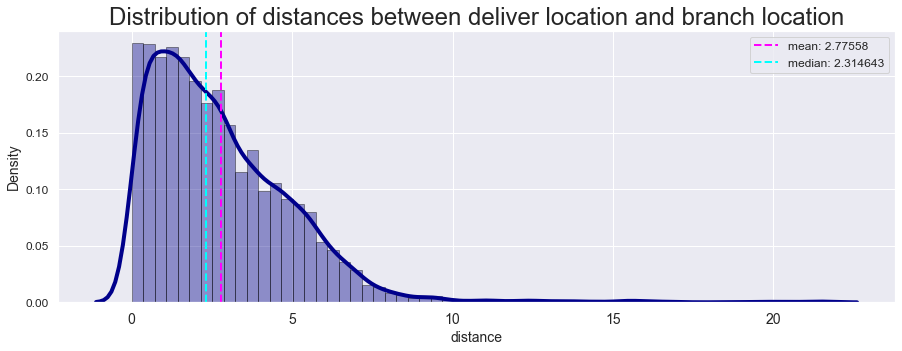

In [36]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.distance, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.distance.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.distance.mean().round(6))}")

ax.axvline(macro.distance.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"median: {str(macro.distance.median().round(6))}")

plt.title("Distribution of distances between deliver location and branch location")
plt.legend(loc='upper right')

del ax

* This left skewd distribution shows that most users probably lives near by the branch location

In [37]:
macro[['distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,8000.0,2.77558,2.228666,0.001425,1.118775,2.314643,3.972838,21.496145


In [38]:
macro[macro.distance>=10]

,order_id,shopper_id,store_branch_id,store_id,seniority,on_demand,promised_time,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item
34,013fa396e9124ae249b45fd21c663192,a5b9ddc0d82e61582fca19ad43dbaacb,a733fa9b25f33689e2adbe72199f0e62,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,False,2019-10-19 00:00:00+00:00,5,126.949115,0.000000,0.8313,2.57,0.760000,4.92,14.031603,34.0,38.900,24
133,0451ce35950f0bcb2b41cbc824c7e3a6,14fca708c4c7f8fc40891a9cdb5efd83,e1e32e235eee1f970470a3a6658dfdd5,c4ca4238a0b923820dcc509a6f75849b,bb29b8d0d196b5db5a5350e5e3ae2b1f,True,2019-10-18 22:08:00+00:00,4,64.817211,22.133333,NaN,2.19,1.000000,5.00,20.327384,4.0,5.000,4
426,0e1addda1c73a16bd76b131da71bd232,140ffd020b51c2c9918344f72b58749b,10a7cdd970fe135cf4f7bb55c0e3b59f,a87ff679a2f3e71d9181a67b7542122c,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 23:24:00+00:00,4,76.116976,23.400000,0.8938,1.50,0.480000,5.00,10.181276,5.0,5.000,5
593,138635cb9be7d8f3464b423c05d3384b,6a8f8a246cc6fd73b8974a7fcfa95d85,087408522c31eeb1f982bc0eaf81d35f,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,True,2019-10-19 01:26:00+00:00,5,65.996318,1.433333,0.8414,1.25,0.880000,5.00,10.683252,25.0,24.568,9
854,1b134cef69775e3e6959879d7a0fe194,a6ffb1a8bb960b92b68cbb4044338d31,e1e32e235eee1f970470a3a6658dfdd5,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 21:58:00+00:00,4,107.268718,21.966667,0.8583,1.29,0.840000,4.96,16.614915,30.0,30.000,10
915,1cf46ca70eda7cd63d6e7c8f23e8e3b4,a7b21cef88c09671d0110c817169553a,9461cce28ebe3e76fb4b931c35a169b0,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,False,2019-10-19 15:00:00+00:00,5,104.722002,15.000000,NaN,2.19,0.545455,NaN,11.688640,62.0,62.000,31
952,1e38d15fe14753189c883a8207f5321a,a052c47ab25d3fdeee550f525c474f23,9461cce28ebe3e76fb4b931c35a169b0,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 21:38:00+00:00,4,126.874516,21.633333,0.8295,1.62,0.863636,4.87,15.521071,25.0,26.016,20
1048,2109eca7b3b7af042925af5f8747e889,570bc67d15c62392bf98a8482af9ea51,087408522c31eeb1f982bc0eaf81d35f,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-19 14:00:00+00:00,5,100.308640,14.000000,0.8627,1.78,0.680000,4.92,12.558854,29.0,29.000,12
1141,240330852af55fed3244b9b371371e72,a0ac4efea515519b760d18962752a2a9,e1e32e235eee1f970470a3a6658dfdd5,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,True,2019-10-18 22:17:00+00:00,4,160.834481,22.283333,0.8560,1.33,0.960000,4.92,19.490602,70.0,74.300,34
1209,264ac9be5205c07cc96979a2b672adf3,4fa160c1c68bfde946aa0bfa09a35435,9461cce28ebe3e76fb4b931c35a169b0,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 22:08:00+00:00,4,66.759143,22.133333,NaN,2.19,0.625000,NaN,12.934454,9.0,8.850,9


* Probably most of the customers are locals, *i.e.* they live near by the shoppers
* However, there are a few in a **distance** greater than 10 km

### Resource: seniority

* **seniority** is the experience level of the shopper

In [39]:
macro[['seniority']]

,seniority
0,41dc7c9e385c4d2b6c1f7836973951bf
1,50e13ee63f086c2fe84229348bc91b5b
2,41dc7c9e385c4d2b6c1f7836973951bf
3,6c90661e6d2c7579f5ce337c3391dbb9
4,50e13ee63f086c2fe84229348bc91b5b
...,...
7995,6c90661e6d2c7579f5ce337c3391dbb9
7996,6c90661e6d2c7579f5ce337c3391dbb9
7997,6c90661e6d2c7579f5ce337c3391dbb9
7998,50e13ee63f086c2fe84229348bc91b5b


In [41]:
print(f"Percentage of each seniority:\n{macro['seniority'].value_counts(' ')*100}")

Percentage of each seniority:
6c90661e6d2c7579f5ce337c3391dbb9    61.3000
50e13ee63f086c2fe84229348bc91b5b    22.3500
41dc7c9e385c4d2b6c1f7836973951bf    15.0875
bb29b8d0d196b5db5a5350e5e3ae2b1f     1.2625
Name: seniority, dtype: float64


### Target Analysis: total_minutes

In [42]:
macro[['order_id','total_minutes']]

,order_id,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,72.853598
4,0013011fa72b498b9feb84f4e7104980,143.040919
...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,40.134711


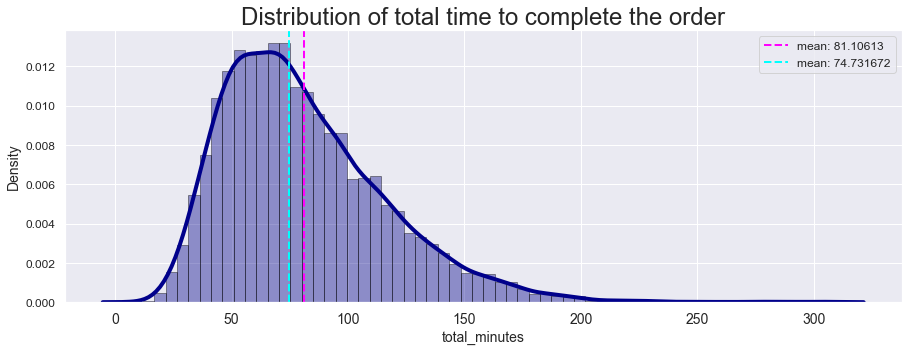

In [43]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(macro.total_minutes, hist=True, kde=True, 
         bins=int(180/3), color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

ax.axvline(macro.total_minutes.mean(), 
           color='magenta', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.total_minutes.mean().round(6))}")

ax.axvline(macro.total_minutes.median(), 
           color='cyan', 
           linestyle='dashed', 
           linewidth=2, 
           label=f"mean: {str(macro.total_minutes.median().round(6))}")

plt.title("Distribution of total time to complete the order")
plt.legend(loc='upper right')

del ax

## Bivariate Analysis

### Quantity VS target

In [44]:
macro[['order_id','quantity','no_item','total_minutes']]

,order_id,quantity,no_item,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,8.000,8.0,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,2.000,2.0,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,39.000,39.0,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,13.000,13.0,72.853598
4,0013011fa72b498b9feb84f4e7104980,64.636,65.0,143.040919
...,...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,18.100,16.0,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,72.015,72.0,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,52.332,53.0,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,39.602,39.0,40.134711


In [45]:
conditions = [
    (macro.no_item <= 20),
    ((macro.no_item > 20) & (macro.no_item <= 40)),
    ((macro.no_item > 40) & (macro.no_item <= 60)),
    ((macro.no_item > 60) & (macro.no_item <= 80)),
    ((macro.no_item > 80) & (macro.no_item <= 100)),
    (macro.no_item > 100),
]

choices = ['1-20', '21-40', '41-60', '61-80', '81-100', '>100']

macro['no_item_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

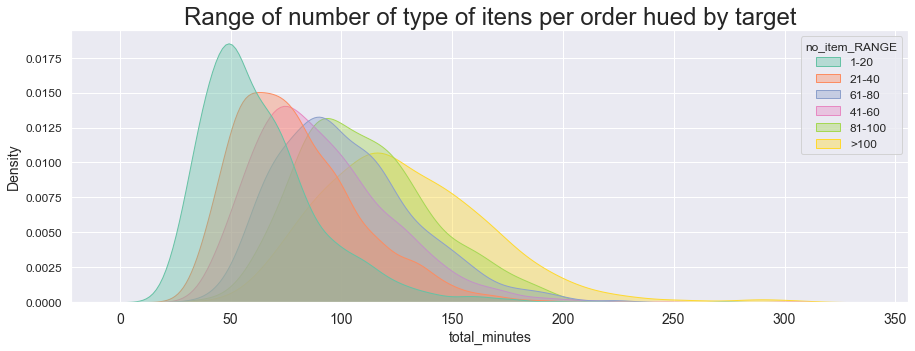

In [46]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='no_item_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Range of number of type of itens per order hued by target')

del ax

**Hypothesis 1:** More products ordered imply more time to complete the order $\to$ **Accepted**

### Distance VS target

In [47]:
macro[['order_id','distance','total_minutes']]

,order_id,distance,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,0.579554,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.989345,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,3.735978,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,1.226007,72.853598
4,0013011fa72b498b9feb84f4e7104980,1.905397,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,5.799480,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,0.333459,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,4.513264,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,1.391585,40.134711


In [48]:
conditions = [
    (macro.distance <= 2),
    ((macro.distance > 2) & (macro.distance <= 4)),
    ((macro.distance > 4) & (macro.distance <= 6)),
    ((macro.distance > 6) & (macro.distance <= 8)),
    ((macro.distance > 8) & (macro.distance <= 10)),
    (macro.distance > 10),
]

choices = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']

macro['distance_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

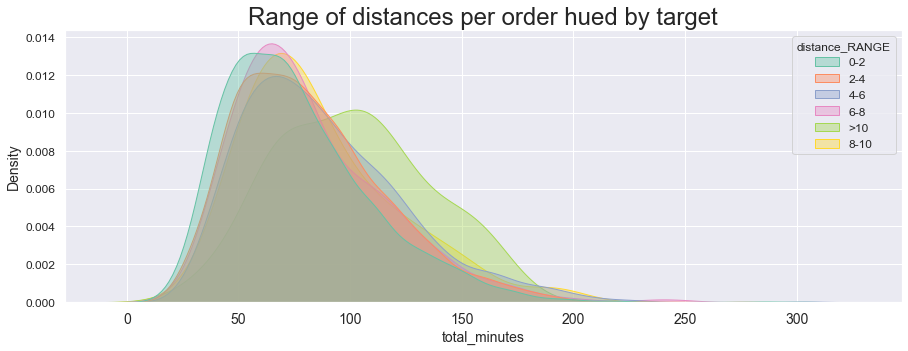

In [49]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='distance_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Range of distances per order hued by target')

del ax

**Hypothesis 2:** The farthest the customer is than more time to complete the order $\to$ **Accepted**

**Hypothesis 9:** The farthest the branch is than more time to complete the order $\to$ **Accepted**

### on_demand VS target

In [50]:
macro[['order_id','on_demand','total_minutes']]

,order_id,on_demand,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,True,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,True,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,False,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,False,72.853598
4,0013011fa72b498b9feb84f4e7104980,False,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,False,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,True,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,False,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,True,40.134711


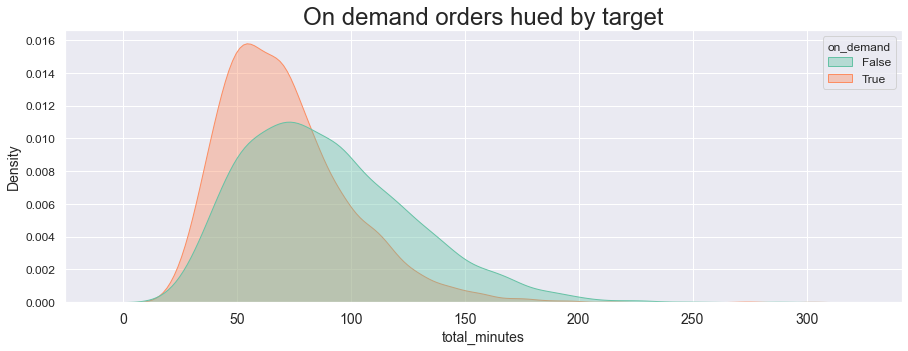

In [51]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='on_demand', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('On demand orders hued by target')

del ax

**Hypothesis 3:** If the order is on demand than lesser time to complete the order $\to$ **Accepted**

### seniority VS target

In [52]:
macro[['order_id','seniority','total_minutes']]

,order_id,seniority,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,41dc7c9e385c4d2b6c1f7836973951bf,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,50e13ee63f086c2fe84229348bc91b5b,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,41dc7c9e385c4d2b6c1f7836973951bf,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,6c90661e6d2c7579f5ce337c3391dbb9,72.853598
4,0013011fa72b498b9feb84f4e7104980,50e13ee63f086c2fe84229348bc91b5b,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,6c90661e6d2c7579f5ce337c3391dbb9,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,6c90661e6d2c7579f5ce337c3391dbb9,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,6c90661e6d2c7579f5ce337c3391dbb9,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,50e13ee63f086c2fe84229348bc91b5b,40.134711


In [53]:
macro.seniority.value_counts()

6c90661e6d2c7579f5ce337c3391dbb9    4904
50e13ee63f086c2fe84229348bc91b5b    1788
41dc7c9e385c4d2b6c1f7836973951bf    1207
bb29b8d0d196b5db5a5350e5e3ae2b1f     101
Name: seniority, dtype: int64

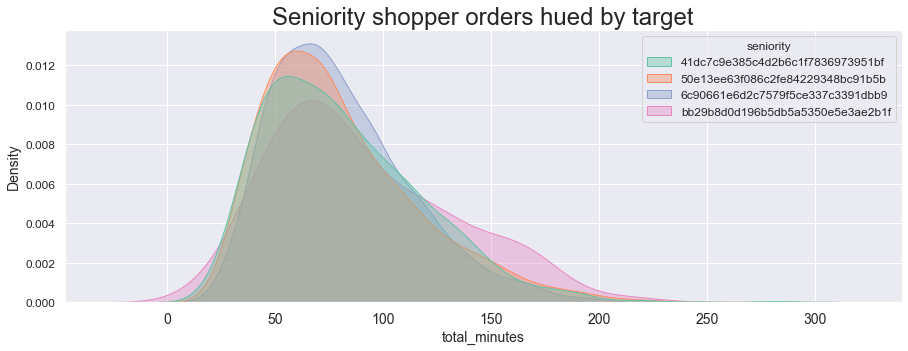

In [54]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='seniority', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Seniority shopper orders hued by target')

del ax

**Hypothesis 4:** High seniority implies less time to complete the order $\to$ **Rejected**

### found_rate VS target

In [55]:
macro[['order_id','found_rate','total_minutes']]

,order_id,found_rate,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,0.8473,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.8407,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,0.9012,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,0.8781,72.853598
4,0013011fa72b498b9feb84f4e7104980,0.8301,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,0.8853,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,0.8973,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,0.8981,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,0.8771,40.134711


In [59]:
conditions = [
    (macro.found_rate <= 0.2),
    ((macro.found_rate > 0.2) & (macro.found_rate <= 0.4)),
    ((macro.found_rate > 0.4) & (macro.found_rate <= 0.6)),
    ((macro.found_rate > 0.6) & (macro.found_rate <= 0.8)),
    (macro.found_rate > 0.8)
]

choices = ['<0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '>0.8']

macro['found_rate_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

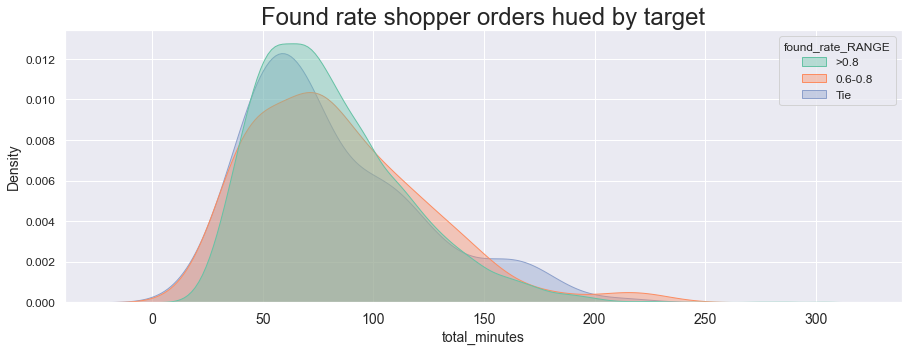

In [60]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='found_rate_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Found rate shopper orders hued by target')

del ax

In [64]:
macro[['found_rate','found_rate_RANGE']].loc[macro['found_rate_RANGE']=='Tie']

,found_rate,found_rate_RANGE
18,NaN,Tie
61,NaN,Tie
103,NaN,Tie
116,NaN,Tie
131,NaN,Tie
...,...,...
7872,NaN,Tie
7910,NaN,Tie
7983,NaN,Tie
7985,NaN,Tie


**Hypothesis 5:** High found rate implies less time to complete the order $\to$ **Rejected**

### picking_speed VS target

In [65]:
macro[['order_id','picking_speed','total_minutes']]

,order_id,picking_speed,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,2.30,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,1.57,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,2.50,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,1.27,72.853598
4,0013011fa72b498b9feb84f4e7104980,3.12,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,1.30,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,0.97,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,1.37,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,1.07,40.134711


In [66]:
conditions = [
    (macro.picking_speed <= 1),
    ((macro.picking_speed > 1) & (macro.picking_speed <= 3)),
    ((macro.picking_speed > 3) & (macro.picking_speed <= 5)),
    ((macro.picking_speed > 5) & (macro.picking_speed <= 7)),
    ((macro.picking_speed > 7) & (macro.picking_speed <= 9)),
    (macro.picking_speed > 9)
]

choices = ['1', '1-3', '3-5', '5-7', '7-9', '>9']

macro['picking_speed_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

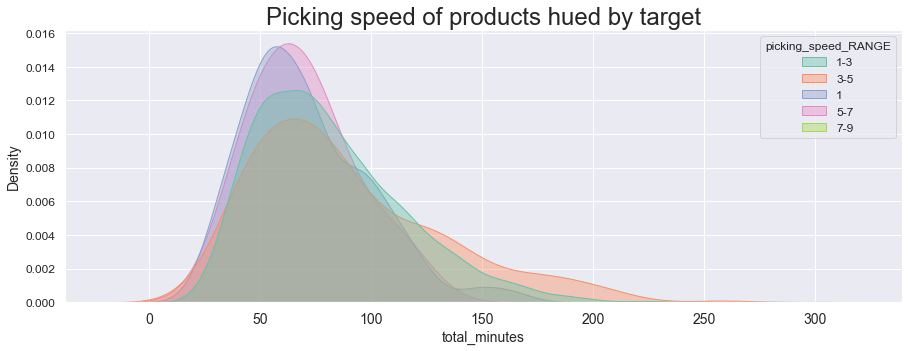

In [67]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='picking_speed_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Picking speed of products hued by target')

del ax

**Hypothesis 6:** High picking speed implies less time to complete the order $\to$ **Rejected**

### accepted_rate VS target

In [69]:
macro[['order_id','accepted_rate','total_minutes']]

,order_id,accepted_rate,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,0.920000,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.840000,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,1.000000,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,0.920000,72.853598
4,0013011fa72b498b9feb84f4e7104980,0.857143,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,1.000000,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,1.000000,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,0.960000,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,0.840000,40.134711


In [70]:
conditions = [
    (macro.accepted_rate <= 0.2),
    ((macro.accepted_rate > 0.2) & (macro.accepted_rate <= 0.4)),
    ((macro.accepted_rate > 0.4) & (macro.accepted_rate <= 0.6)),
    ((macro.accepted_rate > 0.6) & (macro.accepted_rate <= 0.8)),
    ((macro.accepted_rate > 0.8) & (macro.accepted_rate <= 1))
]

choices = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

macro['accepted_rate_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

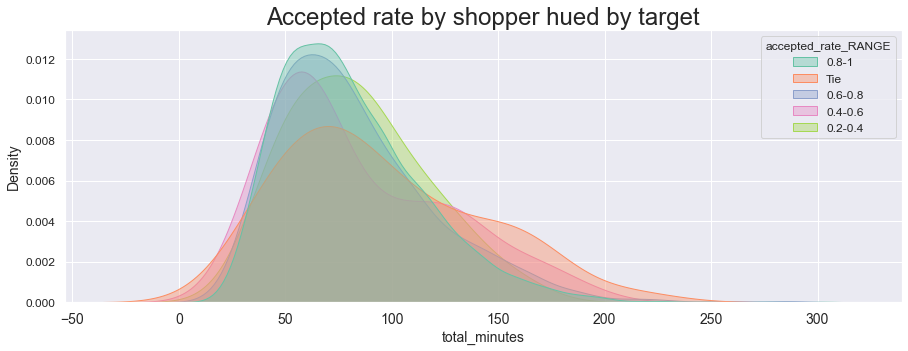

In [71]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='accepted_rate_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Accepted rate by shopper hued by target')

del ax

In [73]:
macro[['accepted_rate','accepted_rate_RANGE']].loc[macro['accepted_rate_RANGE']=='Tie']

,accepted_rate,accepted_rate_RANGE
18,NaN,Tie
231,NaN,Tie
605,NaN,Tie
668,NaN,Tie
836,NaN,Tie
1058,NaN,Tie
1200,NaN,Tie
1228,NaN,Tie
1398,NaN,Tie
1673,NaN,Tie


**Hypothesis 7:** High accepted rate implies less time to complete the order $\to$ **Rejected**

### rating VS target

In [74]:
macro[['order_id','rating','total_minutes']]

,order_id,rating,total_minutes
0,0004a3841c1eeb6c6e77585a941c21e0,4.88,39.001464
1,0005a6ecbbde1e8d273f5577bcff2c9c,4.72,41.164442
2,0007baeb6700fc203be2d1f1e11222d7,4.92,136.453089
3,0012195a6a8ca9ec308a3010eeea8ebc,4.88,72.853598
4,0013011fa72b498b9feb84f4e7104980,5.00,143.040919
...,...,...,...
7995,ffc3234b2e009e5422a4b5e24961c038,4.76,92.146266
7996,ffcc66cd4d1056b67523a39ff07d7700,4.84,57.553529
7997,ffcf270be4bba33349ce827c70fe9439,4.80,103.938002
7998,ffdbc12cfcf7101a517a7eb7e1776c43,4.92,40.134711


In [75]:
conditions = [
    (macro.rating <= 1),
    ((macro.rating > 1) & (macro.rating <= 2)),
    ((macro.rating > 2) & (macro.rating <= 3)),
    ((macro.rating > 3) & (macro.rating <= 4)),
    ((macro.rating > 4) & (macro.rating <= 5))
]

choices = ['<1', '1-2', '2-3', '3-4', '4-5']

macro['rating_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

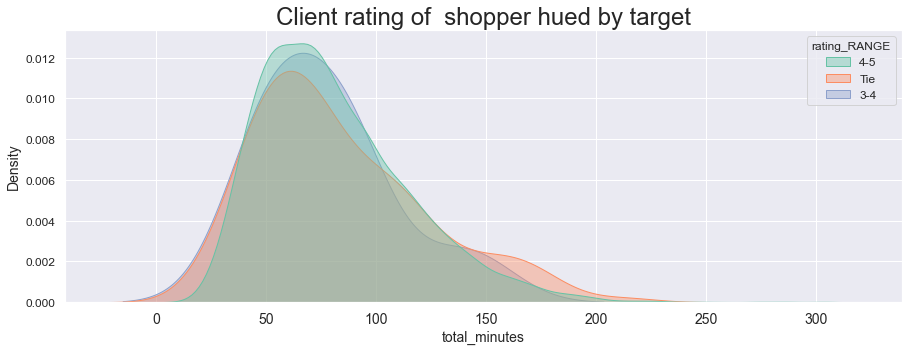

In [76]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=macro, x='total_minutes', hue='rating_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("total_minutes")
plt.title('Client rating of  shopper hued by target')

del ax

In [77]:
macro[['rating','rating_RANGE']].loc[macro['rating_RANGE']=='Tie']

,rating,rating_RANGE
18,NaN,Tie
61,NaN,Tie
116,NaN,Tie
131,NaN,Tie
217,NaN,Tie
...,...,...
7847,NaN,Tie
7866,NaN,Tie
7872,NaN,Tie
7910,NaN,Tie


**Hipotheses 8:** High rating implies less time to complete the order $\to$ **Rejected**

## Correlation Analysis

### Pairwise analysis

In [78]:
macro.head()

,order_id,shopper_id,store_branch_id,store_id,seniority,on_demand,promised_time,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item,no_item_RANGE,distance_RANGE,found_rate_RANGE,picking_speed_RANGE,accepted_rate_RANGE,rating_RANGE
0,0004a3841c1eeb6c6e77585a941c21e0,9142155b2c404cf6fa3d25db2053da03,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,True,2019-10-18 20:18:00+00:00,4,39.001464,20.30,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4,1-20,0-2,>0.8,1-3,0.8-1,4-5
1,0005a6ecbbde1e8d273f5577bcff2c9c,169a1820a33c9cb6037ef27025cbbe62,06fe1c234519f6812fc4c1baae25d6af,918317b57931b6b7a7d29490fe5ec9f9,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 21:09:00+00:00,4,41.164442,21.15,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1,1-20,0-2,>0.8,1-3,0.8-1,4-5
2,0007baeb6700fc203be2d1f1e11222d7,be1b1c18b570dde0053ac1de527fc7c2,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,False,2019-10-19 00:00:00+00:00,5,136.453089,0.00,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22,21-40,2-4,>0.8,1-3,0.8-1,4-5
3,0012195a6a8ca9ec308a3010eeea8ebc,572adecb1c4538ef2492dfbd3b951c83,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,False,2019-10-19 18:00:00+00:00,5,72.853598,18.00,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11,1-20,0-2,>0.8,1-3,0.8-1,4-5
4,0013011fa72b498b9feb84f4e7104980,92ce0da04dc7370cdf2ab85232caa754,45fbc6d3e05ebd93369ce542e8f2322d,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,False,2019-10-19 00:00:00+00:00,5,143.040919,0.00,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44,61-80,0-2,>0.8,3-5,0.8-1,4-5


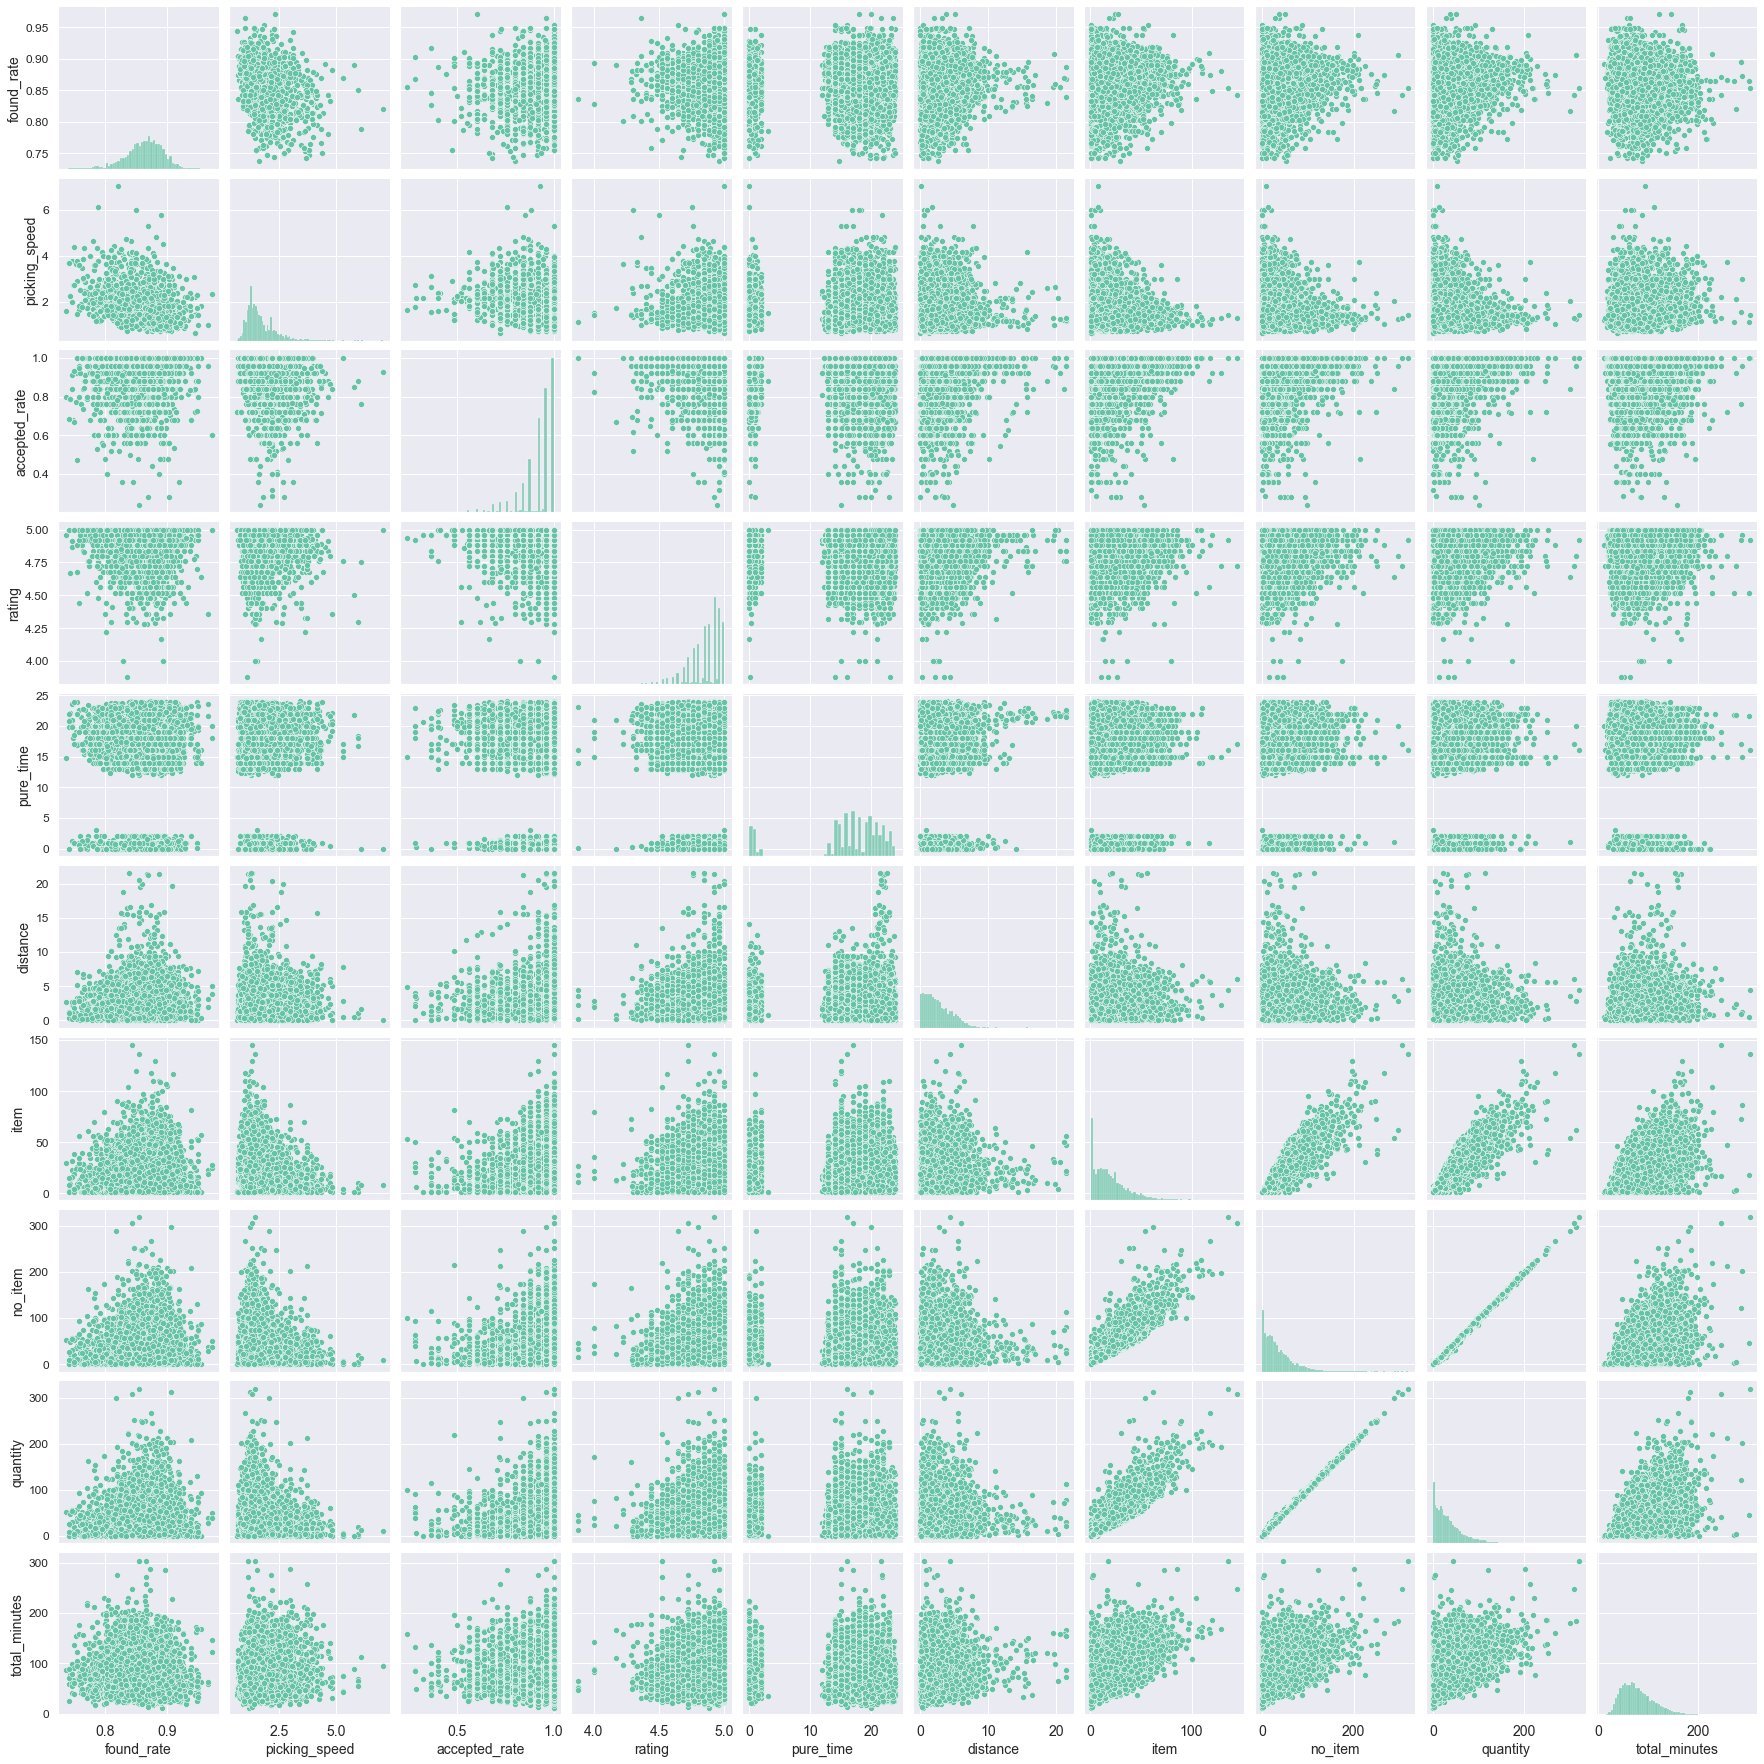

In [79]:
cols = [
    'found_rate',    
    'picking_speed', 
    'accepted_rate', 
    'rating', 
    'pure_time', 
    'distance',
    'item',
    'no_item',
    'quantity',
    'total_minutes'
]
sns.pairplot(macro[cols])

**Notice that:** 
* Fot the majority of resources the pairwise plot didn't show a "preferred direction". 
* Regarding the quantity, item and no_item resources the presence of a preferred directions is simply because the three resource means basically the same info. 
* However there's a slightly pairwise correlation between quantity VS total_minutes (which is the Hypothesis 1)

### Cross-correlation Analysis

* First, it will be necessary to apply an encoding to categorical variables, in addition to transforming variables with only two categories into dichotomous

In [80]:
macro.head()

,order_id,shopper_id,store_branch_id,store_id,seniority,on_demand,promised_time,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item,no_item_RANGE,distance_RANGE,found_rate_RANGE,picking_speed_RANGE,accepted_rate_RANGE,rating_RANGE
0,0004a3841c1eeb6c6e77585a941c21e0,9142155b2c404cf6fa3d25db2053da03,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,True,2019-10-18 20:18:00+00:00,4,39.001464,20.30,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4,1-20,0-2,>0.8,1-3,0.8-1,4-5
1,0005a6ecbbde1e8d273f5577bcff2c9c,169a1820a33c9cb6037ef27025cbbe62,06fe1c234519f6812fc4c1baae25d6af,918317b57931b6b7a7d29490fe5ec9f9,50e13ee63f086c2fe84229348bc91b5b,True,2019-10-18 21:09:00+00:00,4,41.164442,21.15,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1,1-20,0-2,>0.8,1-3,0.8-1,4-5
2,0007baeb6700fc203be2d1f1e11222d7,be1b1c18b570dde0053ac1de527fc7c2,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,41dc7c9e385c4d2b6c1f7836973951bf,False,2019-10-19 00:00:00+00:00,5,136.453089,0.00,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22,21-40,2-4,>0.8,1-3,0.8-1,4-5
3,0012195a6a8ca9ec308a3010eeea8ebc,572adecb1c4538ef2492dfbd3b951c83,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,6c90661e6d2c7579f5ce337c3391dbb9,False,2019-10-19 18:00:00+00:00,5,72.853598,18.00,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11,1-20,0-2,>0.8,1-3,0.8-1,4-5
4,0013011fa72b498b9feb84f4e7104980,92ce0da04dc7370cdf2ab85232caa754,45fbc6d3e05ebd93369ce542e8f2322d,c4ca4238a0b923820dcc509a6f75849b,50e13ee63f086c2fe84229348bc91b5b,False,2019-10-19 00:00:00+00:00,5,143.040919,0.00,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44,61-80,0-2,>0.8,3-5,0.8-1,4-5


In [81]:
macro_onehot = pd.get_dummies(macro, columns = ['on_demand','seniority'])
del macro_onehot['on_demand_False'], macro_onehot['order_id']

In [82]:
macro_onehot.head()

,shopper_id,store_branch_id,store_id,promised_time,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item,no_item_RANGE,distance_RANGE,found_rate_RANGE,picking_speed_RANGE,accepted_rate_RANGE,rating_RANGE,on_demand_True,seniority_41dc7c9e385c4d2b6c1f7836973951bf,seniority_50e13ee63f086c2fe84229348bc91b5b,seniority_6c90661e6d2c7579f5ce337c3391dbb9,seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f
0,9142155b2c404cf6fa3d25db2053da03,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,2019-10-18 20:18:00+00:00,4,39.001464,20.30,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4,1-20,0-2,>0.8,1-3,0.8-1,4-5,1,1,0,0,0
1,169a1820a33c9cb6037ef27025cbbe62,06fe1c234519f6812fc4c1baae25d6af,918317b57931b6b7a7d29490fe5ec9f9,2019-10-18 21:09:00+00:00,4,41.164442,21.15,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1,1-20,0-2,>0.8,1-3,0.8-1,4-5,1,0,1,0,0
2,be1b1c18b570dde0053ac1de527fc7c2,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,2019-10-19 00:00:00+00:00,5,136.453089,0.00,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22,21-40,2-4,>0.8,1-3,0.8-1,4-5,0,1,0,0,0
3,572adecb1c4538ef2492dfbd3b951c83,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,2019-10-19 18:00:00+00:00,5,72.853598,18.00,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11,1-20,0-2,>0.8,1-3,0.8-1,4-5,0,0,0,1,0
4,92ce0da04dc7370cdf2ab85232caa754,45fbc6d3e05ebd93369ce542e8f2322d,c4ca4238a0b923820dcc509a6f75849b,2019-10-19 00:00:00+00:00,5,143.040919,0.00,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44,61-80,0-2,>0.8,3-5,0.8-1,4-5,0,0,1,0,0


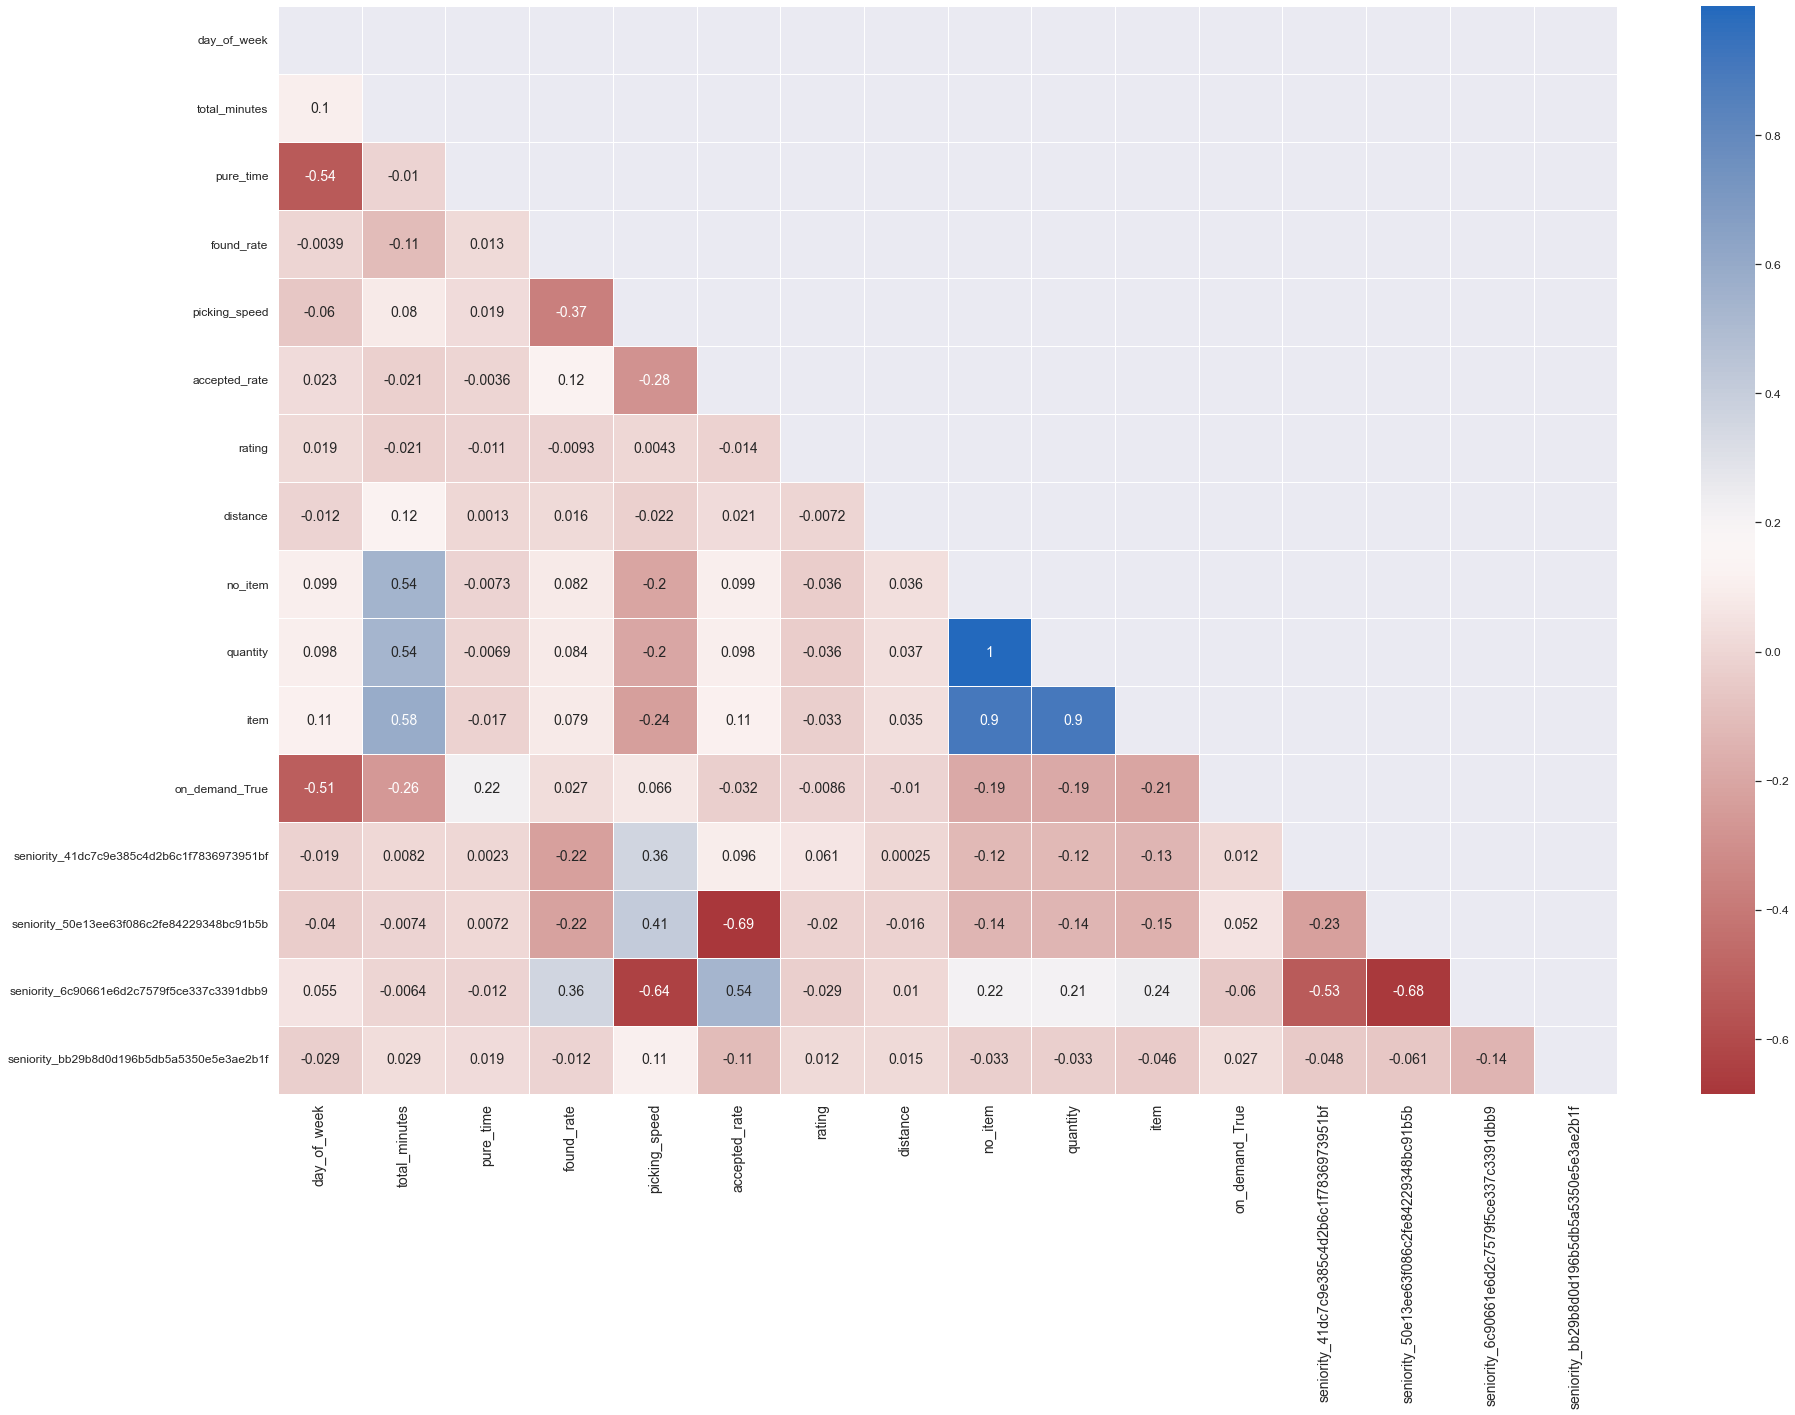

In [83]:
plt.figure(figsize=(30,20))
corrMatrix = macro_onehot.corr()
mask = np.triu(np.ones_like(macro_onehot.corr(), dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="vlag_r", linewidths=0.5, linecolor='white', mask=mask)
plt.show()

## Hypothesis Conclusion

<br>
<table>
	<thead>
        <tr>
			<th colspan = "4" style="text-align:center;">Hypotheses summary</th>
		</tr>
		<tr>
			<th>Group</th>
			<th>#</th>
			<th>Hypothesis</th>
            <th>Result</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Products <br> informations</strong></td>
			<td><strong>H1</strong></td>
			<td style="background-color:#dde2ed;">More products ordered imply more time to complete the order.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="2" style="background-color:#dde2ed;"><strong>Orders <br> informations</strong></td>
			<td><strong>H2</strong></td>
			<td style="background-color:#dde2ed;">The farthest the customer is than more time to complete the order.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H3</strong></td>
			<td style="background-color:#dde2ed;">If the order is on demand than lesser time to complete the order.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="5" style="background-color:#dde2ed;"><strong>Shopper <br> informations</strong></td>
			<td><strong>H4</strong></td>
			<td style="background-color:#dde2ed;">High seniority implies less time to complete the order.</td>
            <td style="background-color:#dde2ed;">Rejected</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H5</strong></td>
			<td style="background-color:#dde2ed;">High found rate implies less time to complete the order.</td>
            <td style="background-color:#dde2ed;">Rejected</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H6</strong></td>
			<td style="background-color:#dde2ed;">High picking speed implies less time to complete the order.</td>
            <td style="background-color:#dde2ed;">Rejected</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H7</strong></td>
			<td style="background-color:#dde2ed;">High accepted rate implies less time to complete the order.</td>
            <td style="background-color:#dde2ed;">Rejected</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H8</strong></td>
			<td style="background-color:#dde2ed;">High rating implies less time to complete the order.</td>
            <td style="background-color:#dde2ed;">Rejected</td>
		</tr>
        <tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Store Branch <br> informations</strong></td>
			<td><strong>H9</strong></td>
			<td style="background-color:#dde2ed;">The farthest the branch is than more time to complete the order.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr>
    </tbody>
</table>